<a href="https://colab.research.google.com/github/jfaguirre/Python/blob/main/Tarea_2_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 2 Modulo 2

In [ ]:
# Preparamos las librerias que posiblemente necesitaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Importamos el DataSet del portal https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
df = pd.read_csv('/content/sample_data/Salary Data.csv');
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
# Validamos si tenemos datos nulos
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [ ]:
# Agregare los datos faltantes manualmente, aun que supongo que era mejor eliminarlos por ser solo dos.
filas_nulas = df[df.isnull().any(axis=1)]
filas_nulas

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Agregare dos valores ficticios siguiendo los ejemplo de los otros usuarios
df.loc[172, ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']] = [32.0, "Male", "Master's", "Data Analyst", 5.0, 80000.0]
df.loc[260, ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']] = [29.0, "Male", "Bachelor's", "Sales Manager", 9.0, 90000.0]

# Consultamos ahora si no hay mas nulos
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
# Modificare o estandarizare el valor de Male y Female a M y F
df['Gender'] = df['Gender'].replace({'Male': 'M', 'Female': 'F'})
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,M,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,F,Master's,Data Analyst,3.0,65000.0
2,45.0,M,PhD,Senior Manager,15.0,150000.0
3,36.0,F,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,M,Master's,Director,20.0,200000.0
5,29.0,M,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,F,Master's,Product Manager,12.0,120000.0
7,31.0,M,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,F,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,M,PhD,Senior Scientist,10.0,110000.0


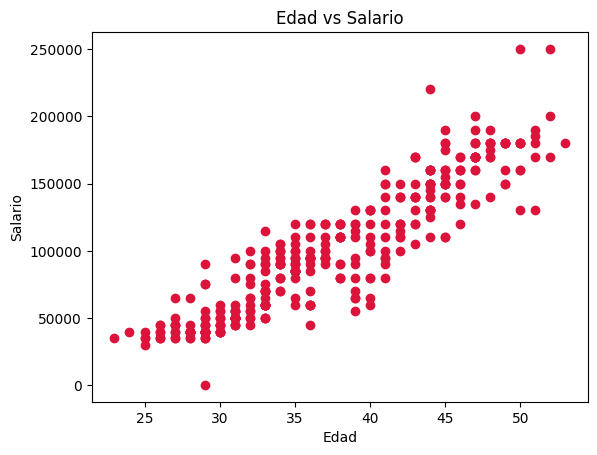

In [ ]:
# Graficaremos los datos de edad, años de experiencia y salario
plt.scatter(df['Age'], df['Salary'], color="#dc143c")
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Edad vs Salario')
plt.show()

In [ ]:
# Normalizamos los datos numericos
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])
df_scaler = pd.DataFrame(df_scaler, columns=['Age', 'Years of Experience', 'Salary'])
df_scaler.head(10)

,Age,Years of Experience,Salary
0,-0.764153,-0.767227,-0.218351
1,-1.330752,-1.073221,-0.738518
2,1.077293,0.762740,1.030051
3,-0.197554,-0.461234,-0.842552
4,2.068842,1.527723,2.070386
5,-1.189102,-1.226218,-0.946585
6,0.652344,0.303749,0.405850
7,-0.905803,-0.920224,-0.426418
8,-1.614051,-1.379214,-1.154652
9,0.085745,-0.002244,0.197783


In [ ]:
# Ahora determinamos las variables para x asi como para y
x = df[["Age", "Years of Experience"]]
y = df["Salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Creamos la instancia del modelo
modelo_rl = LinearRegression()
modelo_rl

LinearRegression()

In [ ]:
# Entrenamos al modelo
modelo_rl.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Hacemos una prediccion
y_prediccion = modelo_rl.predict(x_test)
y_prediccion

array([154652.73340638, 103677.92687975, 141284.60831774,  74443.98287455,
       142973.28320622, 174704.92103934, 181388.98358366,  93687.15156806,
        54391.79524159,  94496.17050751, 123730.11451271, 174704.92103934,
        47707.73269727,  91998.47667959,  61075.85778591, 141284.60831774,
        65262.22650231,  38121.46685531,  78630.35159095,  85314.41413527,
       101180.23305183,  94496.17050751, 143782.30214566,  67759.92033023,
        98682.5392239 ,  56080.47013007, 165523.1646671 ,  65262.22650231,
       147159.65192262, 151346.02063902,  46898.71375783, 125418.78940118,
        51894.10141367, 137098.23960134,  76132.65776303,  23944.32282723,
       169709.5333835 ,  47707.73269727,  37716.95738559,  58578.16395799,
        47707.73269727,  87812.10796319, 193948.08973286, 163834.48977862,
        42712.34504143, 141284.60831774, 100371.21411238,  40214.65121351,
        45210.03886935,  42712.34504143, 103677.92687975,  82816.72030734,
        85314.41413527, 1

In [ ]:
# Verificamos el r2 y rmse
print("R²:", r2_score(y_test, y_prediccion))
rmse = np.sqrt(mean_squared_error(y_test, y_prediccion))
print("RMSE:", rmse)

R²: 0.8832845909015143
RMSE: 16835.984495128832


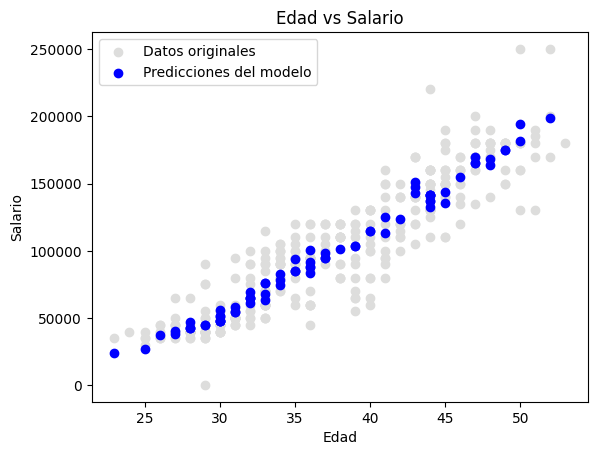

In [ ]:
# Graficaremos los datos de edad, años de experiencia y salario

plt.scatter(df['Age'], df['Salary'], color="#dddddc", label='Datos originales')
plt.scatter(x_test['Age'], y_prediccion, color="blue", label='Predicciones del modelo') # Plotting predictions on test data
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Edad vs Salario')
plt.legend()
plt.show()

In [ ]:
max = df['Salary'].max();
min = df['Salary'].min();
print(min)
print(max)

350.0
250000.0


In [ ]:
# Utilizacion del modelo RandomForest

from sklearn.ensemble import RandomForestRegressor

modelo_random = RandomForestRegressor()
modelo_random.fit(x_train, y_train)
y_prediccion_rf = modelo_random.predict(x_train)
print("R² (RF):", r2_score(y_train, y_prediccion_rf))

# El modelo muestra un alto rendimiento en los datos de entrenamiento ya que muestra un 0.931 de la vareiabilidad usando R. Forest

R² (RF): 0.9319801126673852


In [ ]:
# Ahora probamos para x_test
y_prediccion_test = modelo_random.predict(x_test)
print("R² en test (RF):", r2_score(y_test, y_prediccion_test))

# El modelo esta generalizando bien
y_prediccion_test

R² en test (RF): 0.8742604242145439


array([155185.        ,  88636.11111111, 168092.5       ,  87021.42857143,
       140318.1547619 , 180000.        , 167604.54545455,  98926.40873016,
        50549.31124431, 101598.13131313, 130674.52380952, 180000.        ,
        40000.        ,  86364.58333333,  58220.41125541, 168092.5       ,
        52920.23809524,  39995.26190476,  91663.69047619,  86226.11180486,
        98460.74223162, 101598.13131313, 156997.81218781,  61125.63603064,
       106810.24531025,  55648.61111111, 162850.51587302,  52920.23809524,
       149125.17857143, 155077.26190476,  60433.11327561, 145884.76190476,
        48323.99350649, 147174.81240981,  91603.57142857,  36466.66666667,
       166890.15873016,  40000.        ,  41130.44871795,  58995.43109668,
        40000.        ,  85115.95062102, 183831.21212121, 175774.31235431,
        40000.        , 168092.5       , 109216.66666667,  42505.86538462,
        40000.        ,  40000.        ,  88636.11111111,  96278.75      ,
        86226.11180486, 1

In [ ]:
# Aplicar hiperparámetros
modelo_random = RandomForestRegressor(max_depth=10, n_estimators=100, min_samples_leaf=4)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo_random, x_train, y_train, cv=5, scoring='r2')
print("R² promedio (CV):", scores.mean())

R² promedio (CV): 0.8561291809666173
